# Exploring the experiment meta data

In [1]:
import xarray as xr

### How many data files do we have?

In [2]:
import glob

In [3]:
all_data_files = glob.glob("../steinmentz_data_curation/data/**/*.nc", recursive=True)
all_data_files

['../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2016-12-14_Cori.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2016-12-17_Cori.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2016-12-18_Cori.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2017-01-07_Muller.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2017-01-08_Muller.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2017-01-08_Radnitz.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2017-01-09_Muller.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2017-01-09_Radnitz.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2017-01-10_Radnitz.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2017-01-11_Radnitz.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2017-01-12_Radnitz.nc',
 '../steinm

In [4]:
len(all_data_files)

39

### Loading one of the data files as an XArray Dataset

In [5]:
data_path = all_data_files[0]
data_path

'../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2016-12-14_Cori.nc'

In [6]:
dset = xr.open_dataset(data_path)
dset

<xarray.Dataset>
Dimensions:         (mouse: 1, session_date: 1, trial: 364, time: 250, cell: 734)
Coordinates:
  * mouse           (mouse) object 'Cori'
  * session_date    (session_date) object '2016-12-14'
  * trial           (trial) int64 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364
  * time            (time) float64 0.01 0.02 0.03 0.04 ... 2.47 2.48 2.49 2.5
  * cell            (cell) int64 1 2 3 4 5 6 7 8 ... 728 729 730 731 732 733 734
Data variables: (12/25)
    contrast_left   (mouse, session_date, trial) int8 ...
    contrast_right  (mouse, session_date, trial) int8 ...
    gocue           (mouse, session_date, trial) float64 ...
    stim_onset      (mouse, session_date, trial) float64 ...
    feedback_type   (mouse, session_date, trial) float64 ...
    feedback_time   (mouse, session_date, trial) float64 ...
    ...              ...
    trough_to_peak  (mouse, session_date, cell) int8 ...
    ccf_ap          (mouse, session_date, cell) float64 ...
    ccf_dv          (mouse, session_date, cell) float64 ...
    ccf_lr          (mouse, session_date, cell) float64 ...
    brain_area      (mouse, session_date, cell) object ...
    brain_groups    (mouse, session_date, cell) object ...
Attributes:
    bin_size:    0.01
    stim_onset:  0.5

In [7]:
list(dset.variables)

['mouse',
 'session_date',
 'trial',
 'contrast_left',
 'contrast_right',
 'gocue',
 'stim_onset',
 'feedback_type',
 'feedback_time',
 'response_type',
 'response_time',
 'reaction_type',
 'reaction_time',
 'prev_reward',
 'active_trials',
 'time',
 'wheel',
 'licks',
 'pupil_x',
 'pupil_y',
 'pupil_area',
 'face',
 'cell',
 'spks',
 'trough_to_peak',
 'ccf_ap',
 'ccf_dv',
 'ccf_lr',
 'brain_area',
 'brain_groups']

In [8]:
dset.face

<xarray.DataArray 'face' (mouse: 1, session_date: 1, trial: 364, time: 250)>
[91000 values with dtype=float64]
Coordinates:
  * mouse         (mouse) object 'Cori'
  * session_date  (session_date) object '2016-12-14'
  * trial         (trial) int64 1 2 3 4 5 6 7 8 ... 358 359 360 361 362 363 364
  * time          (time) float64 0.01 0.02 0.03 0.04 0.05 ... 2.47 2.48 2.49 2.5

In [9]:
dset["contrast_left"]

<xarray.DataArray 'contrast_left' (mouse: 1, session_date: 1, trial: 364)>
[364 values with dtype=int8]
Coordinates:
  * mouse         (mouse) object 'Cori'
  * session_date  (session_date) object '2016-12-14'
  * trial         (trial) int64 1 2 3 4 5 6 7 8 ... 358 359 360 361 362 363 364

In [10]:
dset[["contrast_left", "contrast_right"]]

<xarray.Dataset>
Dimensions:         (mouse: 1, session_date: 1, trial: 364)
Coordinates:
  * mouse           (mouse) object 'Cori'
  * session_date    (session_date) object '2016-12-14'
  * trial           (trial) int64 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364
Data variables:
    contrast_left   (mouse, session_date, trial) int8 ...
    contrast_right  (mouse, session_date, trial) int8 ...
Attributes:
    bin_size:    0.01
    stim_onset:  0.5

In [11]:
subset_dset = dset[["contrast_left", "contrast_right"]]

In [12]:
subset_dset.to_dataframe()

contrast_left  contrast_right
mouse session_date trial                               
Cori  2016-12-14   1                100               0
                   2                  0              50
                   3                100              50
                   4                  0               0
                   5                 50             100
...                                 ...             ...
                   360               50              25
                   361               50              25
                   362                0              50
                   363               25               0
                   364              100             100

[364 rows x 2 columns]

In [13]:
subset_dset.to_dataframe().reset_index()

,mouse,session_date,trial,contrast_left,contrast_right
0,Cori,2016-12-14,1,100,0
1,Cori,2016-12-14,2,0,50
2,Cori,2016-12-14,3,100,50
3,Cori,2016-12-14,4,0,0
4,Cori,2016-12-14,5,50,100
...,...,...,...,...,...
359,Cori,2016-12-14,360,50,25
360,Cori,2016-12-14,361,50,25
361,Cori,2016-12-14,362,0,50
362,Cori,2016-12-14,363,25,0


In [14]:
dset[["contrast_left", "contrast_right", "spks"]]

<xarray.Dataset>
Dimensions:         (mouse: 1, session_date: 1, trial: 364, cell: 734, time: 250)
Coordinates:
  * mouse           (mouse) object 'Cori'
  * session_date    (session_date) object '2016-12-14'
  * trial           (trial) int64 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364
  * time            (time) float64 0.01 0.02 0.03 0.04 ... 2.47 2.48 2.49 2.5
  * cell            (cell) int64 1 2 3 4 5 6 7 8 ... 728 729 730 731 732 733 734
Data variables:
    contrast_left   (mouse, session_date, trial) int8 100 0 100 0 ... 0 25 100
    contrast_right  (mouse, session_date, trial) int8 0 50 50 0 ... 25 50 0 100
    spks            (mouse, session_date, cell, trial, time) int8 ...
Attributes:
    bin_size:    0.01
    stim_onset:  0.5

In [15]:
dset[["contrast_left", "contrast_right", "spks"]].to_dataframe().reset_index()

,mouse,session_date,trial,cell,time,contrast_left,contrast_right,spks
0,Cori,2016-12-14,1,1,0.01,100,0,0
1,Cori,2016-12-14,1,1,0.02,100,0,0
2,Cori,2016-12-14,1,1,0.03,100,0,0
3,Cori,2016-12-14,1,1,0.04,100,0,0
4,Cori,2016-12-14,1,1,0.05,100,0,0
...,...,...,...,...,...,...,...,...
66793995,Cori,2016-12-14,364,734,2.46,100,100,0
66793996,Cori,2016-12-14,364,734,2.47,100,100,0
66793997,Cori,2016-12-14,364,734,2.48,100,100,0
66793998,Cori,2016-12-14,364,734,2.49,100,100,0


## Get all the variables with dimensions `(mouse, session_date, trial)`

In [16]:
list(dset.variables)

['mouse',
 'session_date',
 'trial',
 'contrast_left',
 'contrast_right',
 'gocue',
 'stim_onset',
 'feedback_type',
 'feedback_time',
 'response_type',
 'response_time',
 'reaction_type',
 'reaction_time',
 'prev_reward',
 'active_trials',
 'time',
 'wheel',
 'licks',
 'pupil_x',
 'pupil_y',
 'pupil_area',
 'face',
 'cell',
 'spks',
 'trough_to_peak',
 'ccf_ap',
 'ccf_dv',
 'ccf_lr',
 'brain_area',
 'brain_groups']

In [17]:
dset["trial"]

<xarray.DataArray 'trial' (trial: 364)>
array([  1,   2,   3, ..., 362, 363, 364])
Coordinates:
  * trial    (trial) int64 1 2 3 4 5 6 7 8 9 ... 357 358 359 360 361 362 363 364

In [18]:
metadata_variables = [
    'mouse',
    'session_date',
    'trial',
    'contrast_left',
    'contrast_right',
    'gocue',
    'stim_onset',
    # 'feedback_type',
    # 'feedback_time',
    # 'response_type',
    # 'response_time',
    # 'reaction_type',
    # 'reaction_time',
    # 'prev_reward',
    'active_trials'
]

In [19]:
dset[metadata_variables]

<xarray.Dataset>
Dimensions:         (mouse: 1, session_date: 1, trial: 364)
Coordinates:
  * mouse           (mouse) object 'Cori'
  * session_date    (session_date) object '2016-12-14'
  * trial           (trial) int64 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364
Data variables:
    contrast_left   (mouse, session_date, trial) int8 100 0 100 0 ... 0 25 100
    contrast_right  (mouse, session_date, trial) int8 0 50 50 0 ... 25 50 0 100
    gocue           (mouse, session_date, trial) float64 ...
    stim_onset      (mouse, session_date, trial) float64 ...
    active_trials   (mouse, session_date, trial) bool ...
Attributes:
    bin_size:    0.01
    stim_onset:  0.5

In [20]:
df = dset[metadata_variables].to_dataframe().reset_index()
df

,mouse,session_date,trial,contrast_left,contrast_right,gocue,stim_onset,active_trials
0,Cori,2016-12-14,1,100,0,1.027216,0.5,True
1,Cori,2016-12-14,2,0,50,0.874414,0.5,True
2,Cori,2016-12-14,3,100,50,0.825213,0.5,True
3,Cori,2016-12-14,4,0,0,0.761612,0.5,True
4,Cori,2016-12-14,5,50,100,0.662010,0.5,True
...,...,...,...,...,...,...,...,...
359,Cori,2016-12-14,360,50,25,NaN,0.5,False
360,Cori,2016-12-14,361,50,25,NaN,0.5,False
361,Cori,2016-12-14,362,0,50,NaN,0.5,False
362,Cori,2016-12-14,363,25,0,NaN,0.5,False


## Collect data for all sessions

In [21]:
import pandas as pd

In [22]:
all_sessions = []
for data_path in all_data_files:
    dset = xr.open_dataset(data_path)
    all_sessions.append(dset[metadata_variables].to_dataframe().reset_index())
    
df = pd.concat(all_sessions).reset_index()

In [23]:
df

,index,mouse,session_date,trial,contrast_left,contrast_right,gocue,stim_onset,active_trials
0,0,Cori,2016-12-14,1,100,0,1.027216,0.5,True
1,1,Cori,2016-12-14,2,0,50,0.874414,0.5,True
2,2,Cori,2016-12-14,3,100,50,0.825213,0.5,True
3,3,Cori,2016-12-14,4,0,0,0.761612,0.5,True
4,4,Cori,2016-12-14,5,50,100,0.662010,0.5,True
...,...,...,...,...,...,...,...,...,...
14415,421,Lederberg,2017-12-11,422,100,100,NaN,0.5,False
14416,422,Lederberg,2017-12-11,423,0,100,NaN,0.5,False
14417,423,Lederberg,2017-12-11,424,0,50,NaN,0.5,False
14418,424,Lederberg,2017-12-11,425,0,100,NaN,0.5,False


### How many different mice are included in this data?

In [24]:
df.mouse.unique()

array(['Cori', 'Muller', 'Radnitz', 'Moniz', 'Hench', 'Theiler',
       'Richards', 'Forssmann', 'Lederberg', 'Tatum'], dtype=object)

## How many trials were recorded for each mouse?

In [25]:
df.mouse.value_counts().sort_index()

mouse
Cori         1143
Forssmann    1485
Hench        1851
Lederberg    2902
Moniz         896
Muller       1112
Radnitz      1512
Richards     1677
Tatum        1389
Theiler       453
Name: count, dtype: int64

## How many sessions were recorded for each mouse?

In [26]:
df.groupby("mouse").apply(lambda x: len(x.session_date.unique()))

mouse
Cori         3
Forssmann    4
Hench        4
Lederberg    7
Moniz        3
Muller       3
Radnitz      5
Richards     5
Tatum        4
Theiler      1
dtype: int64

## Is the `stimulus_onset` varying?

In [27]:
df.stim_onset.unique()

array([0.5])

## How long did it take to conduct all the sessions?

In [28]:
df_sorted_in_time = df.sort_values(by="session_date")
first_date = df_sorted_in_time.iloc[0]["session_date"]
last_date = df_sorted_in_time.iloc[-1]["session_date"]

pd.to_datetime(last_date) - pd.to_datetime(first_date)

Timedelta('362 days 00:00:00')

## How many active trials per session?

In [29]:
df.groupby("session_date").apply(lambda x: sum(x.active_trials))

session_date
2016-12-14    214
2016-12-17    251
2016-12-18    228
2017-01-07    444
2017-01-08    412
2017-01-09    365
2017-01-10    253
2017-01-11    142
2017-01-12    128
2017-05-15    247
2017-05-16    235
2017-05-18    124
2017-06-15    250
2017-06-16    372
2017-06-17    447
2017-06-18    342
2017-10-11    343
2017-10-29    143
2017-10-30    237
2017-10-31    260
2017-11-01    440
2017-11-02    550
2017-11-04    290
2017-11-05    252
2017-12-05    340
2017-12-06    611
2017-12-07    526
2017-12-08    585
2017-12-09    479
2017-12-10    224
2017-12-11    316
dtype: int64

## Percentage of active trials per session?

In [30]:
df.groupby("session_date").apply(lambda x: sum(x.active_trials)/len(x.active_trials) * 100)

session_date
2016-12-14    58.791209
2016-12-17    62.593516
2016-12-18    60.317460
2017-01-07    80.144404
2017-01-08    65.189873
2017-01-09    62.393162
2017-01-10    69.696970
2017-01-11    56.349206
2017-01-12    53.781513
2017-05-15    69.187675
2017-05-16    68.115942
2017-05-18    63.917526
2017-06-15    69.444444
2017-06-16    77.178423
2017-06-17    80.251346
2017-06-18    75.663717
2017-10-11    75.717439
2017-10-29    56.521739
2017-10-30    68.299712
2017-10-31    70.270270
2017-11-01    66.666667
2017-11-02    71.428571
2017-11-04    72.500000
2017-11-05    69.613260
2017-12-05    75.555556
2017-12-06    73.525872
2017-12-07    70.509383
2017-12-08    72.670807
2017-12-09    68.526466
2017-12-10    67.065868
2017-12-11    74.178404
dtype: float64

## Which session and mouse had the highest percentage of active trials?

In [34]:
active_trials = df.groupby("session_date").apply(lambda x: sum(x.active_trials)/len(x.active_trials) * 100)
active_trials

session_date
2016-12-14    58.791209
2016-12-17    62.593516
2016-12-18    60.317460
2017-01-07    80.144404
2017-01-08    65.189873
2017-01-09    62.393162
2017-01-10    69.696970
2017-01-11    56.349206
2017-01-12    53.781513
2017-05-15    69.187675
2017-05-16    68.115942
2017-05-18    63.917526
2017-06-15    69.444444
2017-06-16    77.178423
2017-06-17    80.251346
2017-06-18    75.663717
2017-10-11    75.717439
2017-10-29    56.521739
2017-10-30    68.299712
2017-10-31    70.270270
2017-11-01    66.666667
2017-11-02    71.428571
2017-11-04    72.500000
2017-11-05    69.613260
2017-12-05    75.555556
2017-12-06    73.525872
2017-12-07    70.509383
2017-12-08    72.670807
2017-12-09    68.526466
2017-12-10    67.065868
2017-12-11    74.178404
dtype: float64

In [32]:
active_trials[active_trials == active_trials.max()]

session_date
2017-06-17    80.251346
dtype: float64

In [33]:
df[df.session_date == "2017-06-17"]["mouse"].unique()

array(['Hench'], dtype=object)

In [54]:
active_trials_percetage = df.groupby("session_date")["active_trials"].transform(lambda x: sum(x)/len(x) * 100)
df = df.assign(active_trials_percetage=active_trials_percetage)
df.groupby("mouse").apply(lambda x: x.loc[x.active_trials_percetage == x.active_trials_percetage.max(), ["session_date", "active_trials_percetage"]].iloc[0]).sort_values("active_trials_percetage", ascending=False)

,session_date,active_trials_percetage
mouse,,
Hench,2017-06-17,80.251346
Muller,2017-01-07,80.144404
Theiler,2017-10-11,75.717439
Lederberg,2017-12-05,75.555556
Tatum,2017-12-06,73.525872
Forssmann,2017-11-04,72.500000
Richards,2017-11-02,71.428571
Radnitz,2017-01-10,69.696970
Moniz,2017-05-15,69.187675


---

## Taking behavioral task variables into account

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob

In [3]:
all_data_files = glob.glob("../steinmentz_data_curation/data/**/*.nc", recursive=True)
all_data_files

['../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2016-12-14_Cori.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2016-12-17_Cori.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2016-12-18_Cori.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2017-01-07_Muller.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2017-01-08_Muller.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2017-01-08_Radnitz.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2017-01-09_Muller.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2017-01-09_Radnitz.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2017-01-10_Radnitz.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2017-01-11_Radnitz.nc',
 '../steinmentz_data_curation/data/processed/neuropixels/steinmetz_2017-01-12_Radnitz.nc',
 '../steinm

In [4]:
metadata_variables = [
    'mouse',
    'session_date',
    'trial',
    'contrast_left',
    'contrast_right',
    'gocue',
    'stim_onset',
    'feedback_type',
    'feedback_time',
    'response_type',
    'response_time',
    'reaction_type',
    'reaction_time',
    'prev_reward',
    'active_trials'
]

## Collect data for all sessions

In [5]:
all_sessions = []
for data_path in all_data_files:
    dset = xr.open_dataset(data_path)
    all_sessions.append(dset[metadata_variables].to_dataframe().reset_index())
    
df = pd.concat(all_sessions).reset_index()

In [6]:
df

,index,mouse,session_date,trial,contrast_left,contrast_right,gocue,stim_onset,feedback_type,feedback_time,response_type,response_time,reaction_type,reaction_time,prev_reward,active_trials
0,0,Cori,2016-12-14,1,100,0,1.027216,0.5,1.0,1.186819,1.0,1.150204,1.0,170.0,-10.000000,True
1,1,Cori,2016-12-14,2,0,50,0.874414,0.5,1.0,1.437623,-1.0,1.399503,-1.0,230.0,-4.733091,True
2,2,Cori,2016-12-14,3,100,50,0.825213,0.5,1.0,0.986016,1.0,0.949291,1.0,200.0,-3.400174,True
3,3,Cori,2016-12-14,4,0,0,0.761612,0.5,1.0,2.296436,0.0,2.266802,1.0,860.0,-4.183592,True
4,4,Cori,2016-12-14,5,50,100,0.662010,0.5,-1.0,0.827613,1.0,0.816776,1.0,140.0,-3.248887,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14415,421,Lederberg,2017-12-11,422,100,100,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
14416,422,Lederberg,2017-12-11,423,0,100,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
14417,423,Lederberg,2017-12-11,424,0,50,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
14418,424,Lederberg,2017-12-11,425,0,100,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


## let's focus on active trials

In [7]:
df = df[df.active_trials]

In [8]:
df.active_trials.all()

True

## Create new columns `correct_turn` and `response_turn` with values "left", "right", or "nogo"

In [9]:
turn_direction = np.sign(df["contrast_left"] - df["contrast_right"])
df["correct_turn"] = turn_direction.apply(lambda x: ["nogo", "right", "left"][int(x)])
df["response_turn"] = df.response_type.apply(lambda x: ["nogo", "right", "left"][int(x)])

/tmp/ipykernel_900/1183780346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["correct_turn"] = turn_direction.apply(lambda x: ["nogo", "right", "left"][int(x)])
/tmp/ipykernel_900/1183780346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["response_turn"] = df.response_type.apply(lambda x: ["nogo", "right", "left"][int(x)])


## Probability of each choice given the combination of contrasts presented 

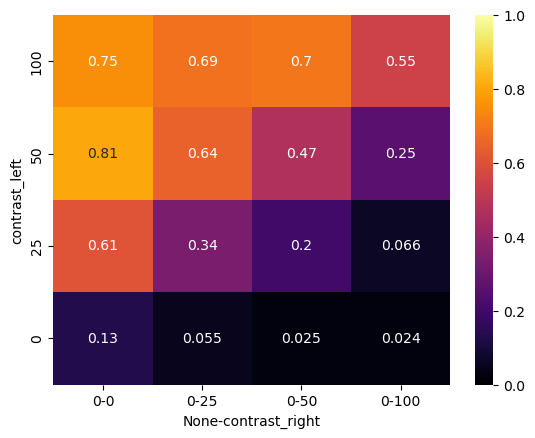

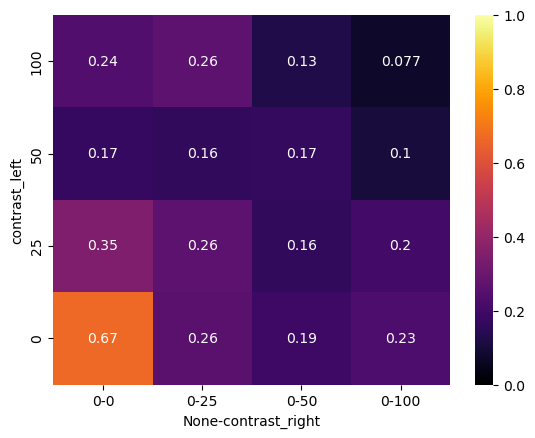

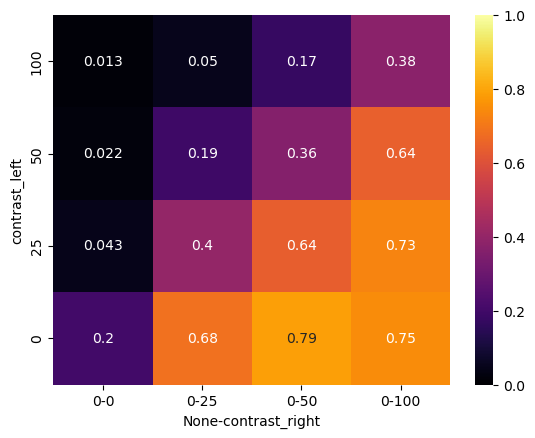

In [31]:
for response_turn in ["right", "nogo", "left"]:
    aa = df.groupby(["contrast_left", "contrast_right"]).apply(lambda dd: np.mean(dd.response_turn == response_turn)).reset_index()
    sns.heatmap(pd.pivot_table(data=aa, index="contrast_left", columns="contrast_right")[::-1], annot=True, vmin=0, vmax=1, cmap="inferno")
    plt.show()

In [48]:
axes.shape

(3,)

In [88]:
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import Normalize

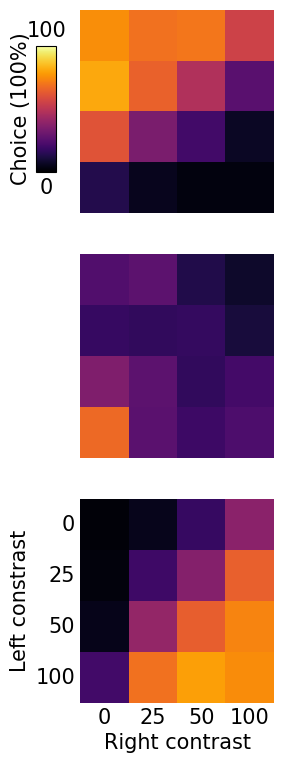

In [118]:
plt.rcParams['font.size'] = 15

fig, axes = plt.subplots(3, 1, figsize=(2.5, 9))
for ax_idx, (ax, response_turn) in enumerate(zip(axes, ["right", "nogo", "left"])):
    aa = df.groupby(["contrast_left", "contrast_right"]).apply(lambda dd: np.mean(dd.response_turn == response_turn)).reset_index()
    sns.heatmap(pd.pivot_table(data=aa, index="contrast_left", columns="contrast_right")[::-1], annot=False, vmin=0, vmax=1, cmap="inferno", ax=ax, cbar=False)
    
    if ax_idx == len(axes)-1:
        ax.set(
            xlabel="Right contrast", ylabel="Left constrast",
            xticklabels=[0, 25, 50, 100], yticklabels=[0, 25, 50, 100],
        )
        ax.tick_params(rotation=0)
    else:
        ax.set(xlabel="", ylabel="", xticks=[], yticks=[])
    ax.tick_params(length=0)

    
cax = fig.add_axes([-.05, .7, .08, .14])
norm = Normalize(vmin=0, vmax=1)
cb = ColorbarBase(cax, cmap="inferno", norm=norm, orientation="vertical", ticks=[])
cax.set_ylabel("Choice (100%)")
cax.text(.5, 1.04, "100", ha="center", va="bottom", transform=cax.transAxes)
cax.text(.5, -.05, "0", ha="center", va="top", transform=cax.transAxes)
cax.yaxis.set_label_position("left")
fig.savefig("fig1c.png", bbox_inches="tight")